In [3]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data.select_dtypes(include=['float64', 'int64']))

In [8]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.index = crypto_names

# Display the scaled DataFrame
display(df_market_data_scaled.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))

In [10]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
for k in range(1,12):
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list



c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data= {
    "k": list(range(1,12)),
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow= pd.DataFrame(elbow_data)

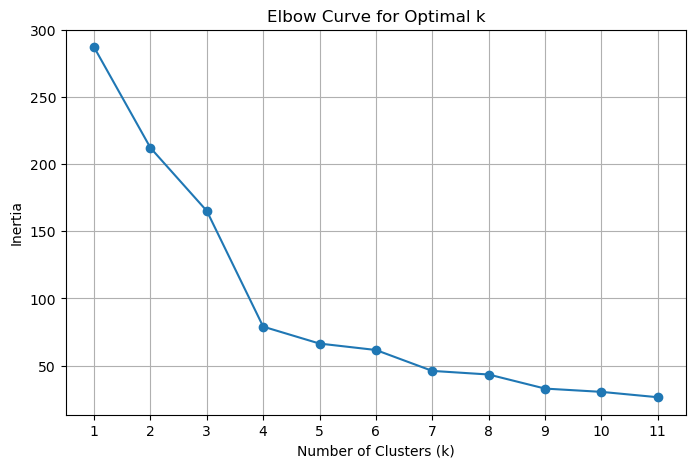

In [12]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with different values of k
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(range(1, 12))  # Ensure x-axis has all k-values from 1 to 11
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** From the Elbow curve, the best value for k appears to be around 4. This is where the curve shows a noticeable "bend," after which the reduction in inertia becomes more gradual.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
from sklearn.cluster import KMeans
# Initialize the K-Means model using the best value for k
k = 4
KMeans_model= KMeans(n_clusters=k, random_state=1)

In [14]:
# Fit the K-Means model using the scaled DataFrame
KMeans_model.fit(df_market_data_scaled)

c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = KMeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [16]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy['Cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame
display(df_market_data_scaled_copy.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters by 24h and 7d Price Changes"
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame down to three principal components.
pca_data=pca.fit_transform(df_market_data_scaled_copy)
df_pca = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"], index=df_market_data_scaled_copy.index)
# View the scaled PCA data
display(df_pca.head())

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


In [21]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

#Print
print("Explained Variance for each Principal Component", explained_variance)


Explained Variance for each Principal Component [0.34871677 0.31363391 0.22627118]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is approximately 0.8886, or 88.86%.
0.34871677+0.31363391+0.22627118=0.88862186

In [22]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original scaled DataFrame
crypto_names = df_market_data_scaled_copy.index

# Set the coin_id column as index
df_pca.index = crypto_names

# Display the scaled PCA DataFrame
display(df_pca.head())

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [24]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
    model.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data ={
    "k": k_values,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

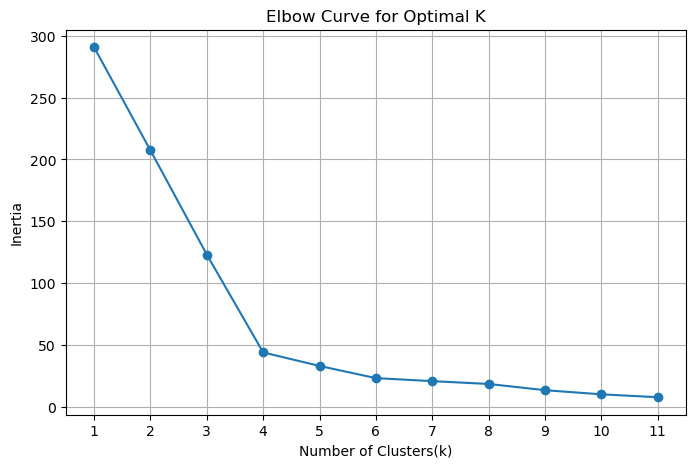

In [26]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8,5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal K")
plt.xticks(range(1,12))
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' would be 4 due to this being where a noticable elbow occurs within the data indicating that increasing the number of clusters beyond this point results in diminishing returns in reducing inertia.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, this is the same as using the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [27]:
# Initialize the K-Means model using the best value for k
k = 4
KMeans_model = KMeans(n_clusters=k, random_state=1)

In [34]:
# Fit the K-Means model using the PCA data
KMeans_model.fit(df_pca)

c:\Users\Logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_predictions = KMeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_predictions)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [37]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_predictions

# Display the copy of the scaled PCA DataFrame
display(df_pca_copy.head())

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1


In [42]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters bu PCA Components"
)

scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

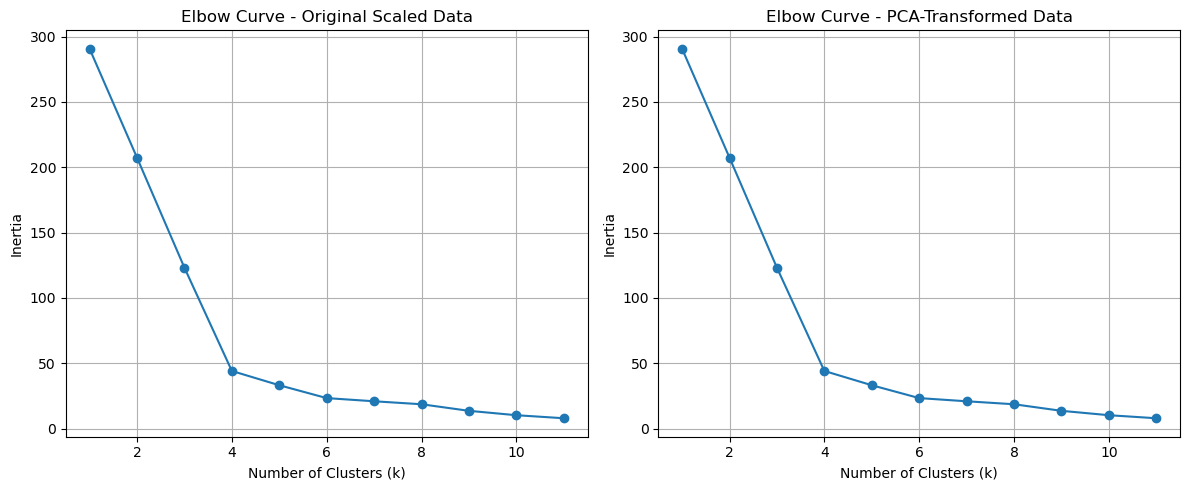

In [44]:
import matplotlib.pyplot as plt

# Create the Elbow curve for the original scaled data
plt.figure(figsize=(12, 5))

# Elbow curve for the original scaled data
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve - Original Scaled Data")
plt.grid(True)

# Elbow curve for the PCA-transformed data
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve - PCA-Transformed Data")
plt.grid(True)

plt.tight_layout()
plt.show()



In [47]:
import hvplot.pandas

# Composite plot to contrast the clusters
scatter_original = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",  
    hover_cols=["coin_id"],  
    title="Clusters in Original Scaled Data"
)

# Scatter plot for clusters in the PCA-transformed data
scatter_pca = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",  
    hover_cols=["coin_id"],  
    title="Clusters in PCA-Transformed Data"
)

# Display both plots in a composite layout
composite_plot = scatter_original + scatter_pca
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PCA1]   (PCA2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA with fewer features keeps the main cluster structure while reducing noise and complexity. Both the original and PCA-transformed data suggest an optimal k of about 4, but PCA makes clusters more compact and clear, improving visualization and interpretation.